<h3 align="center">DS 211, Nov 2019 &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;Numerical Optimization
Mini-Project 2&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
CDS, IISc</h3>

<h3 align="center">                 Problem 2
 <center>Quadratic Programming

## 2(a)
The given problem is


 &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; min &emsp;$ x_{1}^2 + 2x_{2}^2 − 2x_1 − 6x_2 − 2x_1 x_2 ,$
  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp; s.t.&emsp;&emsp; $ x_1 +  x_2 ≤ 2 ,$
      $$−x_1 + 2x_2 ≤ 2,$$
      $$x_1 , x_2 ≥ 0  $$

In [4]:
"""--------- Objective Function -------"""
def f(x1,x2):
    value=x1**2+2*x2**2-2*x1-6*x2-2*x1*x2
    return value 

"""------------ Constraints -----------"""
def constraints_satisfy(x1,x2):
    c1=x1+x2;
    c2=-x1+2*x2;
    if (c1<=2 and c2<=2 and x1>=0 and x2>=0):
        return f(x1,x2)
    else:
        return 0      

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Defining points for plotting obbjective function values
points=300
x1=np.linspace(start = 0, stop = 2, num = points)
x2=np.linspace(start = 0, stop = 2, num = points)
c=np.linspace(start = 0, stop = 0, num = points)

X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
i=0
while i<points:
      c[i]=constraints_satisfy(x1[i],x2[i])
      i=i+1;
xstar1=0.8
xstar2=1.2
xvertex1=[0,0,2/3,2]
xvertex2=[0,1,4/3,0]

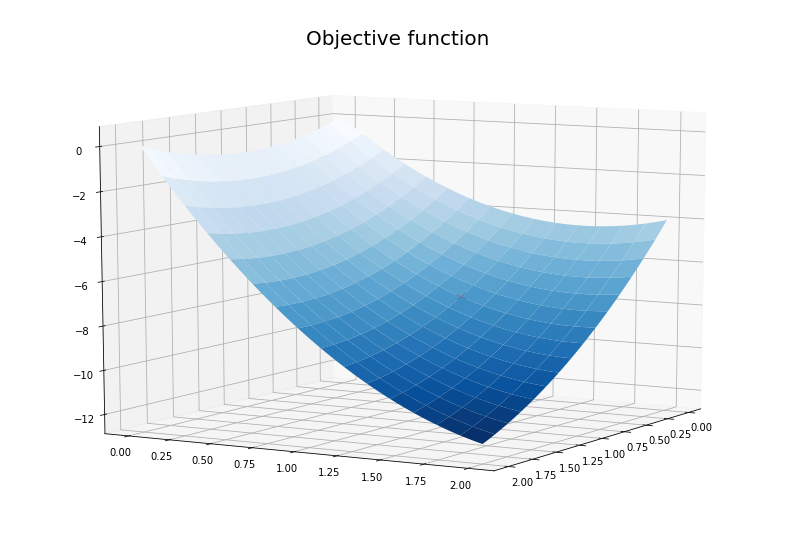

In [7]:
# 3d View of objective funtion
plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, rstride=20, cstride=20,cmap ='Blues_r'
                ,edgecolor='none')
ax.set_title('Objective function',fontsize=20);
ax.scatter(xstar1,xstar2,f(xstar1,xstar2),s=100,zorder=100, color='r')
ax.view_init(10, 30)

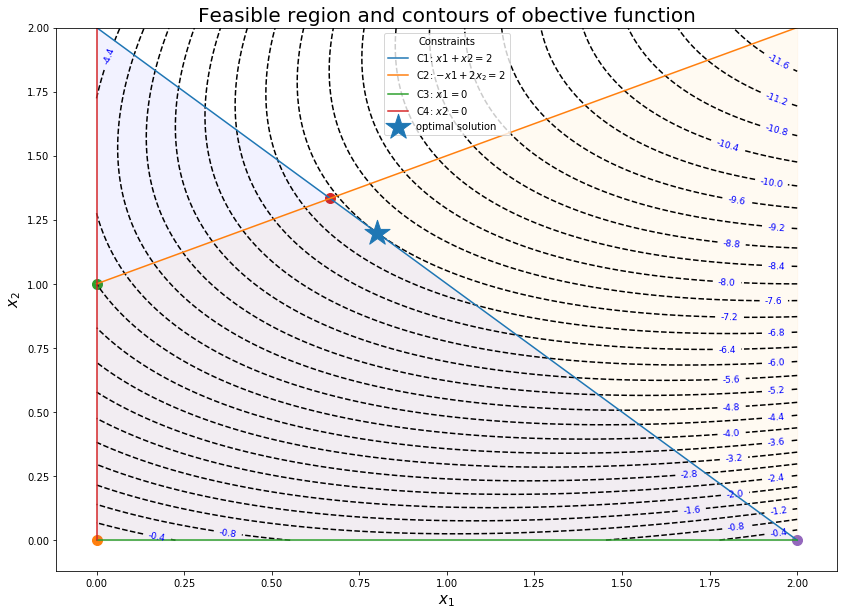

In [8]:
# Plotting contours of objective function and constraints
def plot_region(traj = None):
    
    points=300
    x1=np.linspace(start = 0, stop = 2, num = points)
    x2=np.linspace(start = 0, stop = 2, num = points)
    c=np.linspace(start = 0, stop = 0, num = points)

    X1, X2 = np.meshgrid(x1, x2)
    Z = f(X1, X2)
    i=0
    while i<points:
          c[i]=constraints_satisfy(x1[i],x2[i])
          i=i+1;
    xstar1=0.8
    xstar2=1.2
    xvertex1=[0,0,2/3,2]
    xvertex2=[0,1,4/3,0]

    
    plt.figure(figsize=(14,10))
    cp=plt.contour(X1,X2,Z,30,colors='k')
    # cp=plt.contourf(X1,X2,Z,30)
    plt.clabel(cp,colors = 'b', fmt = '%2.1f', fontsize=9)
    plt.scatter(xstar1,xstar2,marker='*',s=700, label='optimal solution', zorder =1000)
    for i in range(0,4):
        plt.scatter(xvertex1[i],xvertex2[i],s=100)
    plt.xlabel(r"$x_1$",fontsize=15)
    plt.ylabel(r"$x_2$",fontsize=15)
    y1= 2 - x1
    y2= 1 + 0.5*x1
    y3=0*x1
    y4=x1
    y5 =0
    plt.plot(x1, y1 , label='C1: $x1+x2 = 2$')
    plt.plot(x1, y2 , label='C2: $-x1+2x_2 = 2$')
    plt.plot(x1, y3 , label='C3: $x1=0$')
    plt.plot(0*x1, y4,label='C4: $x2=0$')
    plt.title("Feasible region and contours of obective function",fontsize=20)
    plt.fill_between(x1,y5,y2,where=y2 > y5,color='orange', alpha=0.05)
    plt.fill_between(x1,y5,y1,where=y1 > y5,color='blue', alpha=0.05)
    plt.legend(title='Constraints', loc =9)
    
    if traj != None:
        x1list = traj[0]
        x2list = traj[1]
        plt.plot(x1list, x2list, '--', linewidth=5)
        plt.scatter(x1list, x2list, marker = 'X', s = 700)
        plt.scatter(x1list[0], x2list[0], marker = 'X', s = 700, color = 'green')
        
        
plot_region()

## The figure above shows the contour of the objective function with their function values marked in blue on the right.

### The linear constraints are shown as lines and are marked in the legend.

### The vertices (basic feasible points) are marked with dots.

### The feasible region is the middle 'purplish' region (intersection of the yellow and blue shaded regions) 

### The optimal solution is marked with a star. We can observe that it lies on the constraint C1 (mentioned as an equality constraint here to reperesent the boundary.). We can visually (geometrically) see that C1 is a tangent to the contour (valued -7.2.  This is later verified by our implementation in 2b.).

### In other words, the gradient of the objective function is parallel to the gradient of the active constraint C1. Hence, this point is the optimal point.

## 2(b) Implementation of the active set method for quadratic programs

In [9]:
# Function Definitions

def get_pk_lamda(x,G,c,A,b): 
    [m,n]=A.shape   
    Z=np.zeros((m,m))
    K=np.block([[G,A.T],[A,Z]])
    rhs1=c+np.matmul(G,x)
    rhs2=np.matmul(A,x)-b
    rhs=np.concatenate((rhs1,rhs2))
    y = np.linalg.solve(K,rhs)
    p = -y[0:n]
    lamda = y[n:m+n]
    return p,lamda

def get_active_set(xk,G,c,A,b):
    wk=[]
    wc=[]
    Mat= np.matmul(A,xk)
    (m,n)=A.shape
    for i in range (0, m):
        if (Mat[i]== b[i]):
            wk.append(i)
        else:
            wc.append(i)
    return wk, wc


def particular_index(A,index_set):
    Ac=[]
    Ak=[]
    (m,n)=A.shape
    for i in range (0,m):
        if (i not in index_set):
            Ac.append(A[i,:])
        if (i in index_set):
            Ak.append(A[i,:])
    return np.asarray(Ac), np.asarray(Ak)


def get_alpha(wc, A, b, pk, xk):
    itr = len(wc)
    alphaArray = np.zeros((itr))
    min_index = wc[0]
    min_ratio = float('inf')
    for i in range(itr):
        ai = A[wc[i],:]
        bi = b[wc[i]]
        den = np.dot(ai,pk)
        if(den < 0):
            num = bi-np.dot(ai,xk)  
            ratio = num/den
            if(ratio < min_ratio):
                min_ratio = ratio
                min_index = wc[i] 
    alpha = min([1,min_ratio])
    return alpha, min_ratio, min_index


In [10]:
# Main function for the Active set me

def Active_setMethod(xk,G,c,A,b,max_iter, tol):
    x0=xk
    wk, wc=get_active_set(xk,G,c,A,b)
    m = len(A)
    x1_list = [x0[0]]
    x2_list = [x0[1]]
    for k in range (0, max_iter):
        Ak = A[wk,:]
        bk = b[wk]
        pk,lamda_k = get_pk_lamda(xk,G,c,Ak,bk)
        if (sum(abs(pk)<=tol)==len(pk)):
            if (sum(lamda_k >=tol)==len(lamda_k)):
                print("   starting pint : ",x0)
                print("optimal solution : ",xk," ,number of iterations : ",k)
                print("optimal function value: ", f(xk[0],xk[1]))
                print("------------------------------------------------------------")
                plot_region(traj=(x1_list, x2_list))
                return xk,  k-1
            
            else:
                j = np.argmin(lamda_k)
                wc.append(wk[j])
                wk.remove(wk[j])
        else:
            alpha, ratio, index = get_alpha(wc, A, b, pk, xk)
            xk = xk + alpha * pk
            x1_list.append(xk[0])
            x2_list.append(xk[1])
            if (alpha==ratio):
                wk.append(index)
                wc.remove(index)
    return "maximum iteration exceed" ,k

In [11]:
G=np.asarray([[2, -2],[-2, 4]])
c=np.asarray([-2,-6])
A=np.asarray([[-1,-1],[1 ,-2],[1 , 0],[0 , 1]])
b=np.asarray([-2,-2,0,0])
x0=np.asarray([0,0])
max_iter=200
tol = 1e-2


## 2(c)

<h3 align="center"> At the vertex
 <center>   (0,1), (2/3,4/3) , (2,0) , (0,0)

   starting pint :  (0, 1)
optimal solution :  [0.8 1.2]  ,number of iterations :  4
optimal function value:  -7.199999999999999
------------------------------------------------------------


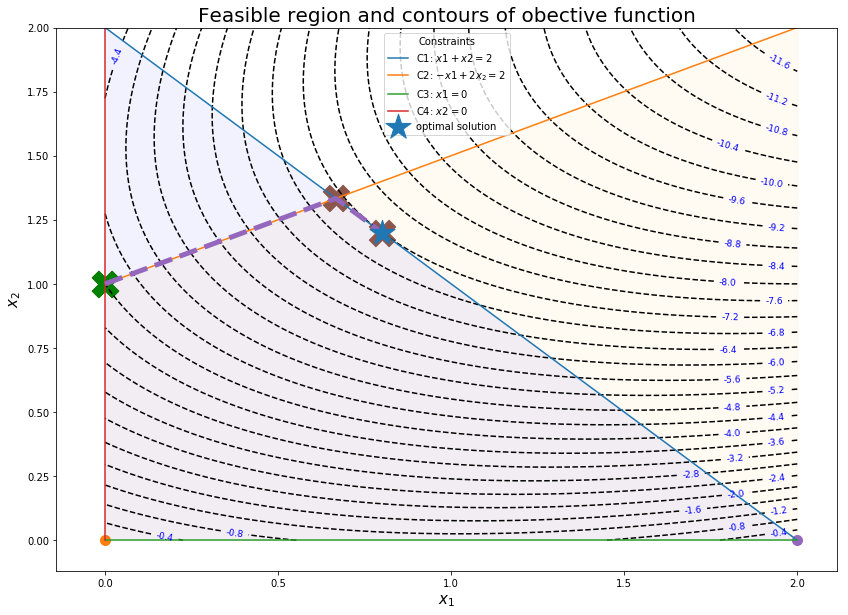

In [12]:
x0=[(0,1), (2/3,4/3), (2,0), (0,0)]
xstar1,itr1 =Active_setMethod(x0[0],G,c,A,b,max_iter, tol)


   starting pint :  (0.6666666666666666, 1.3333333333333333)
optimal solution :  [0.8 1.2]  ,number of iterations :  2
optimal function value:  -7.199999999999999
------------------------------------------------------------


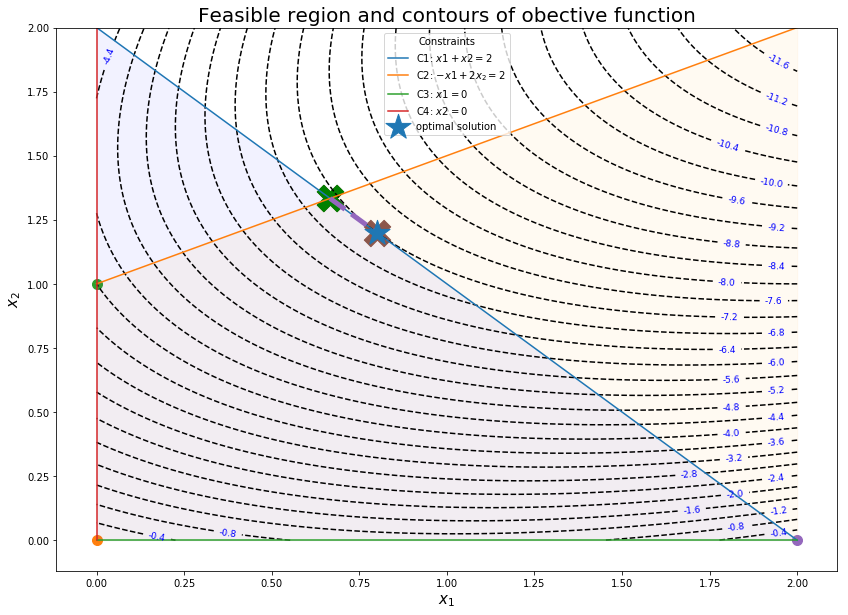

In [13]:
xstar1,itr1 =Active_setMethod(x0[1],G,c,A,b,max_iter, tol)

   starting pint :  (2, 0)
optimal solution :  [0.8 1.2]  ,number of iterations :  2
optimal function value:  -7.200000000000001
------------------------------------------------------------


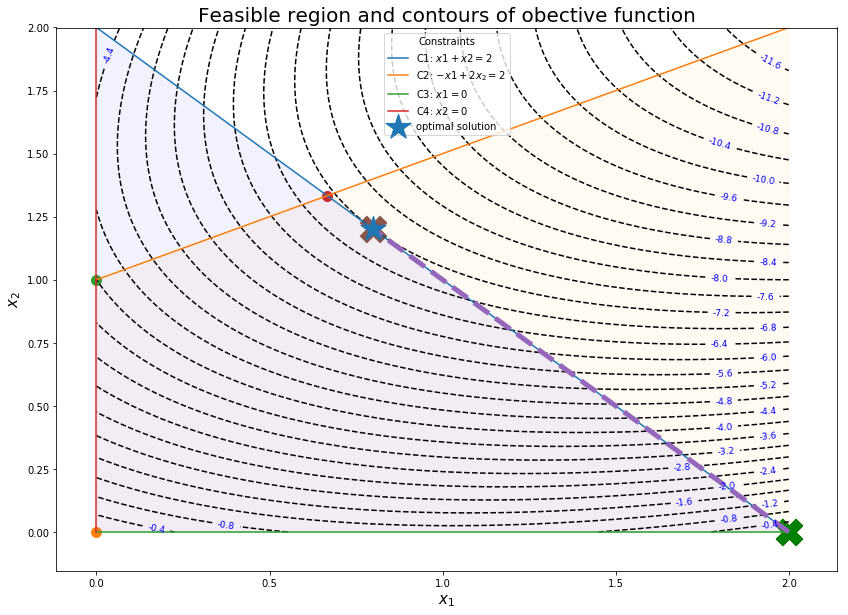

In [14]:
xstar1,itr1 =Active_setMethod(x0[2],G,c,A,b,max_iter, tol)

   starting pint :  (0, 0)
optimal solution :  [0.8 1.2]  ,number of iterations :  6
optimal function value:  -7.199999999999999
------------------------------------------------------------


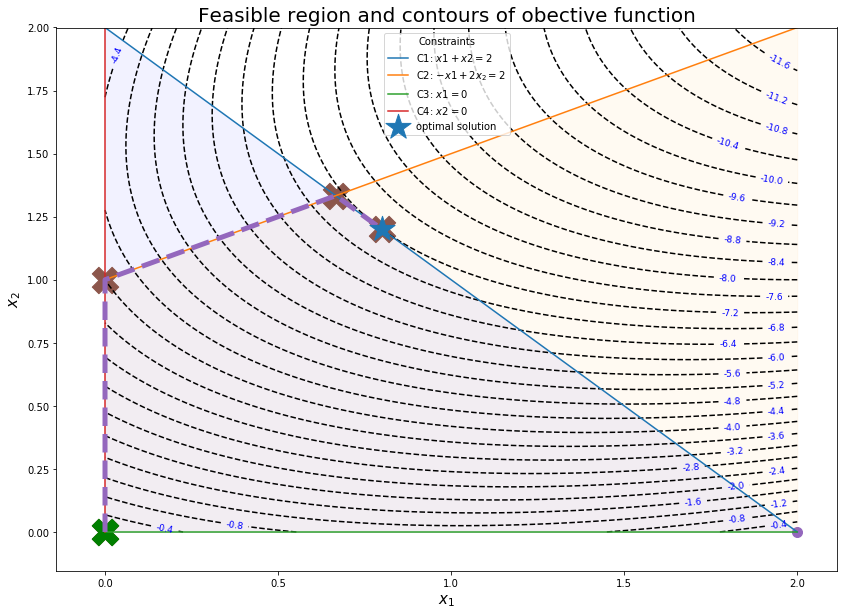

In [15]:
xstar1,itr1 =Active_setMethod(x0[3],G,c,A,b,max_iter, tol)

<h3 align="center">  point interior of feasible region
 <center>   x0= (0.2 , 0.2 )

   starting pint :  (0.2, 0.2)
optimal solution :  [0.8 1.2]  ,number of iterations :  2
optimal function value:  -7.200000000000003
------------------------------------------------------------


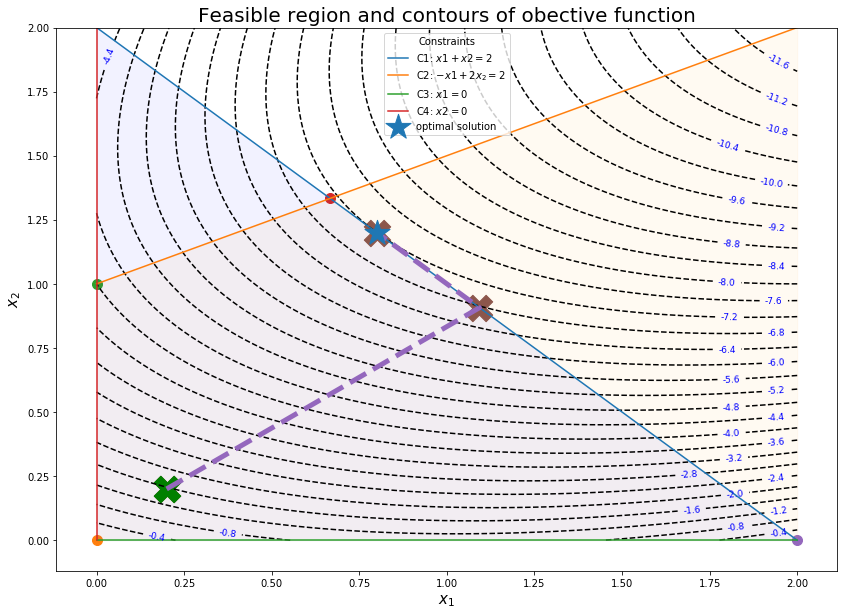

In [16]:
xo =(0.2, 0.2)
xs,itr = Active_setMethod(xo,G,c,A,b,max_iter, tol)
    


<h3 align="center"> non-vertex point on the boundary of the feasible region
 <center>   x0= (0,2/3)

   starting pint :  (0, 0.6666666666666666)
optimal solution :  [0.8 1.2]  ,number of iterations :  5
optimal function value:  -7.200000000000001
------------------------------------------------------------


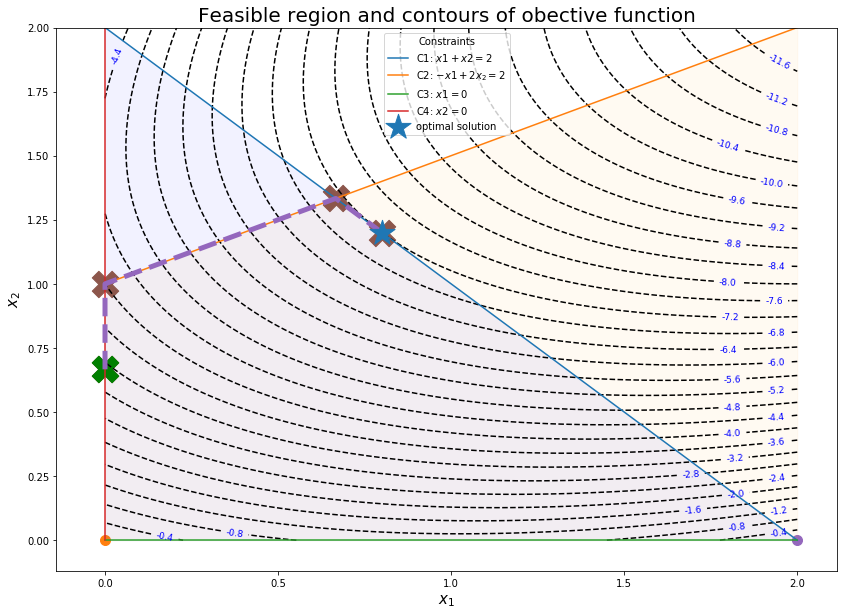

In [17]:
x00=(0,2/3)
xstar, itr= Active_setMethod(x00,G,c,A,b,max_iter, tol)


## Observations

1. The solution for the given problem is x1 = 0.8, x2 =1.2. The optimal function value is -7.2.
2. In all 3 cases, the solution converged to the optimal solution (0.8,1.2)
3. If we start at a vetex, the iterates reach the optimal solution by traversing along the edges, from one vertex to another. When the starting vertex is close to the optimal solution, convergence is acheived in small number of iterations.
4. If we start any point at the boundary of the feasible polytope, the iterates, again, traverse along the edges of the polytope, until the optimal solution is reached.
5. If we start at any point inside the feasible region, the iterate first tries to step towards the minima of the objective function as though it were an unconstrained problem. It stops when it hits a constraint (in our example C1), and then follows a path similar to that desctibed in 4.


## 2(d)

### The relevant matrices and vectors are defined to pose the given quadratic problem in terms of the arguments required by CVXOPT

In [18]:
from cvxopt import matrix, solvers
Q = 1*matrix([[2.0, -2.0],[-2.0, 4.0]])
p = matrix([-2.0,-6.0])
G = matrix([[1.0,-1.0],[1.0,2.0]])
h = matrix([2.0,2.0])

sol=solvers.qp(Q, p, G, h)
print(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -1.2000e+01 -6.0000e+00  6e+00  1e+00  5e-01
 1: -7.0509e+00 -7.5097e+00  5e-01  1e-16  2e-16
 2: -7.1932e+00 -7.2447e+00  5e-02  0e+00  6e-16
 3: -7.1999e+00 -7.2018e+00  2e-03  8e-17  3e-15
 4: -7.2000e+00 -7.2000e+00  2e-05  1e-16  3e-15
 5: -7.2000e+00 -7.2000e+00  2e-07  8e-17  1e-14
Optimal solution found.
[ 8.00e-01]
[ 1.20e+00]



### The solution obtained is (0.8, 1.2). This also verifies our implementation in 2b.

## Comments on algorithm used by CVXOPT

CVXOPT solves quadratic programming problems using 'qp' or 'coneqp' functions. Broadly speaking, these funtions implement Interior Point methods. More specifically, they implement primal-dual path-following methods.



There are 4 keywords here:

-Interior Point Methods

-primal-dual

-path-following





**Interior Point Methods:**

Interior point methods are a class of optimization methods. Geometrically speaking, interior-point methods approach the boundary of the feasible polytope only in the limit. They may approach the solution either from the interior or the exterior of the feasible region, but they never actually lie on the boundary of this region.
(This is in stark contrast with methods like the revised-simplex method for LP, which works its way aroundthe boundary of the feasible polytope, testing a sequence of vertices in turn until it finds the optimal one)

**Primal-Dual methods:**

These methods are a subclass of interior point methods.
These methods express the following KKT conditions as a as vector valued function, $F$:

$ \nabla L = 0   $ &emsp;&emsp; (1) [gradient of lagrangian = 0]

$ Ax =b $ &emsp;&emsp;&emsp; (2): [satisfaction of linear equality constraints]

$ \lambda^{T}s = 0 $ &emsp;&emsp; &emsp;(3) [derived from complementarity condition]


Then succive iterates of the KKT point $(x,\lambda, s)$ are computed based the Newton's direction associated with the above function, such that $(x,s)>0$



**Path-following:**

The path, here, refers to the concept of 'Central Path'. A central path that lies in the 'Strictly Feasible Set'

The strictly feasible set is the set of all $(x, \lambda, s)$ that satisfy conditions (1) and (2), and strictly satisfy the complementarity condition (3).

The cetral path $C$ is a parameterised by $τ$ and is defined as follows

$$ C = \{(x_{τ}, \lambda_{τ}, s_{τ}) | τ>0 \}$$
where, $ \lambda^{T}c = τ $



Most primal-dual algorithms take Newton steps that are biassed towards points on $C$ ,rather than pure Newton steps for $F$. Hence, the term path-following.

Since these steps are biased toward the interior of the nonnegative orthant defined by $$(x,s)≥0$$, it usually is possible to take longer steps along them than along the pure Newton (affine scaling) steps, before violating the positivity condition of the strictly feasiible set.


